In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_clean= pd.read_csv('cleaned_data.csv')


/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_27330/3521527592.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean= pd.read_csv('cleaned_data.csv')


In [5]:
df_clean.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [7]:
df_clean = df_clean.rename(columns={'Variation': 'variation'})

In [9]:
df_clean.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [11]:
df_clean.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
variation            object
visitor_id           object
visit_id             object
process_step         object
date_time            object
dtype: object

In [13]:
df_clean.size

6214558

In [15]:
df_clean.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [17]:
df_clean.shape


(443897, 14)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443897 entries, 0 to 443896
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         443897 non-null  int64  
 1   clnt_tenure_yr    443784 non-null  float64
 2   clnt_tenure_mnth  443784 non-null  float64
 3   clnt_age          443772 non-null  float64
 4   gendr             443784 non-null  object 
 5   num_accts         443784 non-null  float64
 6   bal               443784 non-null  float64
 7   calls_6_mnth      443784 non-null  float64
 8   logons_6_mnth     443784 non-null  float64
 9   variation         317235 non-null  object 
 10  visitor_id        443897 non-null  object 
 11  visit_id          443897 non-null  object 
 12  process_step      443897 non-null  object 
 13  date_time         443897 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 47.4+ MB


In [21]:
df_clean.duplicated().sum()

0

## droping missing values

In [24]:
df_clean.isnull().sum()

client_id                0
clnt_tenure_yr         113
clnt_tenure_mnth       113
clnt_age               125
gendr                  113
num_accts              113
bal                    113
calls_6_mnth           113
logons_6_mnth          113
variation           126662
visitor_id               0
visit_id                 0
process_step             0
date_time                0
dtype: int64

In [26]:
df_clean["clnt_tenure_yr"].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       nan, 47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41.,
       45., 52., 62.])

In [28]:
df_clean["clnt_tenure_yr"].isnull().sum()

113

In [34]:
#cleaning lot of missing values
df_clean = df_clean.dropna()
df_clean.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [36]:
df_clean["bal"].unique()

array([ 45105.3 , 110860.3 ,  52467.79, ...,  44837.16,  44994.24,
       209278.15])

## Rounded numbers in bal column


In [39]:
# rounded numbers in balance
df_clean["bal"]= df_clean["bal"].round(2)


In [41]:
df_clean.loc[:, "bal"] = df_clean["bal"].round(2)


In [43]:
df_clean["bal"]

0          45105.30
1          45105.30
2          45105.30
3          45105.30
4          45105.30
            ...    
317230    209278.15
317231    209278.15
317232    209278.15
317233    209278.15
317234    209278.15
Name: bal, Length: 317123, dtype: float64

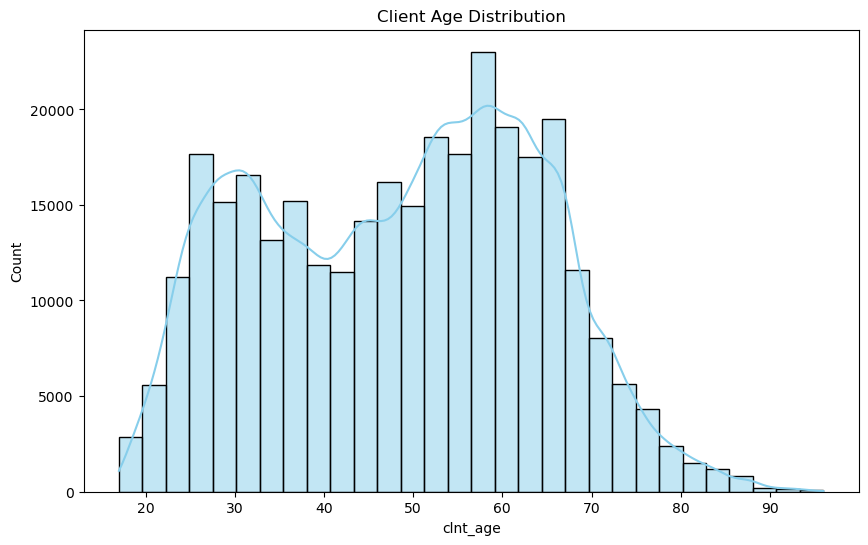

In [59]:
plt.figure(figsize=(10, 6))  
sns.histplot(df_clean['clnt_age'], bins=30, kde=True, color='skyblue')
plt.title("Client Age Distribution")
plt.show()

## KPI

In [51]:
# For 'Test' group:
completion_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique() / df_clean[df_clean['variation'] == 'Test']['visitor_id'].nunique()

# For 'Control' group:
completion_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique() / df_clean[df_clean['variation'] == 'Control']['visitor_id'].nunique()

print(f"Test Completion Rate: {completion_test}")
print(f"Control Completion Rate: {completion_control}")

Test Completion Rate: 0.6519660291560786
Control Completion Rate: 0.5922880743024628


In [68]:
# Convert 'date_time' to datetime format
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'], errors='coerce')
#Sort the data by 'visit_id' and 'date_time' to ensure correct time sequence
df_clean = df_clean.sort_values(by=['visit_id', 'date_time'])


df_clean['time_spent'] = df_clean.groupby('visit_id')['date_time'].diff().dt.total_seconds()
avg_time_per_step = df_clean.groupby('process_step')['time_spent'].mean()

print(avg_time_per_step)

process_step
confirm    129.751824
start      162.416480
step_1      40.123008
step_2      43.984299
step_3      95.868958
Name: time_spent, dtype: float64


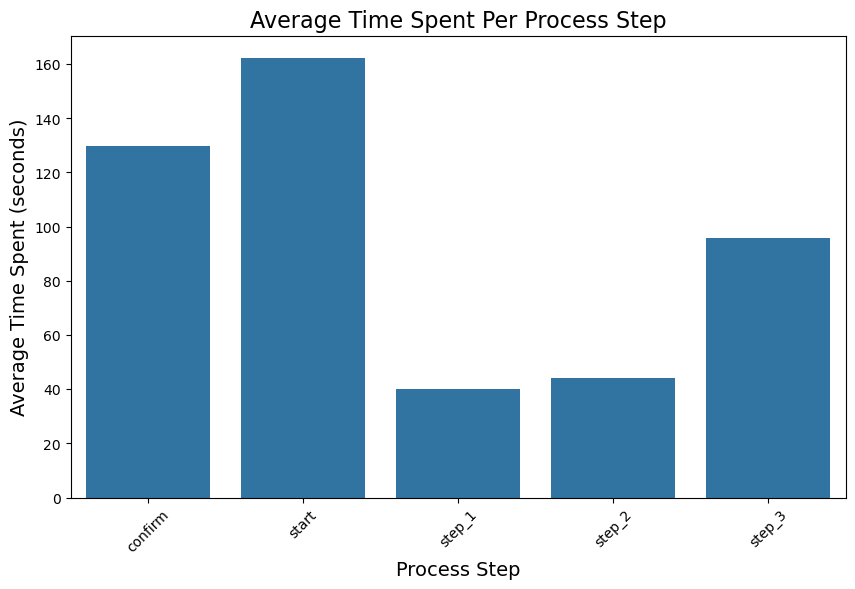

In [76]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=avg_time_per_step.index, y=avg_time_per_step.values);

# Adding labels and title
plt.title('Average Time Spent Per Process Step', fontsize=16);
plt.xlabel('Process Step', fontsize=14);
plt.ylabel('Average Time Spent (seconds)', fontsize=14);
plt.xticks(rotation=45);

## Erorr rate


In [ ]:
df_clean.to_csv("clean_data_v1.csv", index=False)